# Different Taxes and their development in Germany

The german federal statistics office (DEStatis) offers several different datasets about the federal tax income of germany. Using the monthly and quarterly tax income data (uncorrected and before allocation), we want to look at the following research questions:

- How has the overall tax income developed over the past 20 years? 
- Can we see seasonal variations in the data, specifically in the consumer goods taxes?
- What role did the air traffic tax play in the overall tax income since it's introduction in 2011?
- How do the income tax and the three assets taxes (wealth, solidarity, inheritance) compare to each other? Has this ratio changed over the past 20 years?
- How to the energy and electrical energy ("Stromsteuer") tax compare to each other?

Firstly, we need to process the source data and load it into the notebook:

In [4]:
import pandas as pd
from helper_functions import process_source_data

BASE_DIR = '/home/nils/Documents/Repositories/semester-10/rse/rse_24_individual_project/'

process_source_data('data/71211-0005_$F.csv', 'results/monthly_tax_data.csv', False)
process_source_data('data/71211-0003_$F.csv', 'results/quarterly_tax_data.csv', True)

df_m = pd.read_csv(BASE_DIR + 'results/monthly_tax_data.csv', index_col=0).astype('Int64')
df_q = pd.read_csv(BASE_DIR + 'results/quarterly_tax_data.csv', index_col=0).astype('Int64')

Both datasets contain 17 rows of different tax types, with monthly (quarterly) integer values for the years 1999-2024 (2023 for quarterly)

In [3]:
print(df_m.index.values)

['Steuereinnahmen insgesamt' 'Lohnsteuer' 'Umsatzsteuer' 'Tabaksteuer'
 'Kaffeesteuer' 'Alkoholsteuer' 'Alcopopsteuer' 'Schaumweinsteuer'
 'Energiesteuer' 'Stromsteuer' 'Luftverkehrsteuer' 'Solidaritätszuschlag'
 'Vermögensteuer' 'Erbschaftsteuer' 'Biersteuer' 'Getränkesteuer'
 'Schankerlaubnissteuer']


#### Question 1: How has the overall tax income developed over the past 20 years?

The total tax income is only available quaterly, so we will use this dataset to answer the first question. The plot below shows a lot of information combined: 
- The 16 different tax types (excluding the total tax income) are shown as bar plots on the bottom. We can instantly see that income and value added tax make up the biggest chunk of the chosen categories. We can also see a very prevalent pattern: For every year in the dataset, the tax income rises from one quarter to the next, with a significant increase in the fourth quarter
- The blue line shows the quarterly total tax income, as taken directly from the dataset. Here, we also see the same pattern of rising tax income from the first to last quarter for each year. The gap between the bars and the blue line also tells us, how much tax income comes from the tax types not included in our selection: This amount seems to be getting bigger over the years, though we would have to look at that theory in more detail for confirmation.
- The dotted black line shows the total tax income per year, summed up from the quarterly data. This line therefore has less data points (only one dot for each year) and a different value range (right y axis). 

Both the blue and the black line clearly show us that the tax income has increased compared to 20 years ago. We do, however see 
1) a period of stagnation (1999-2005)
2) a sharp increase (2006-2008) 
3) followed by a short decline (2009-2010), possibly due to the financial crisis in 2008
4) a steady increase (2011-2023)
5) that is only disrupted heavily by the Covid crisis in 2020

Text(0, 0.5, 'Tax income (Thousands of Euro)')

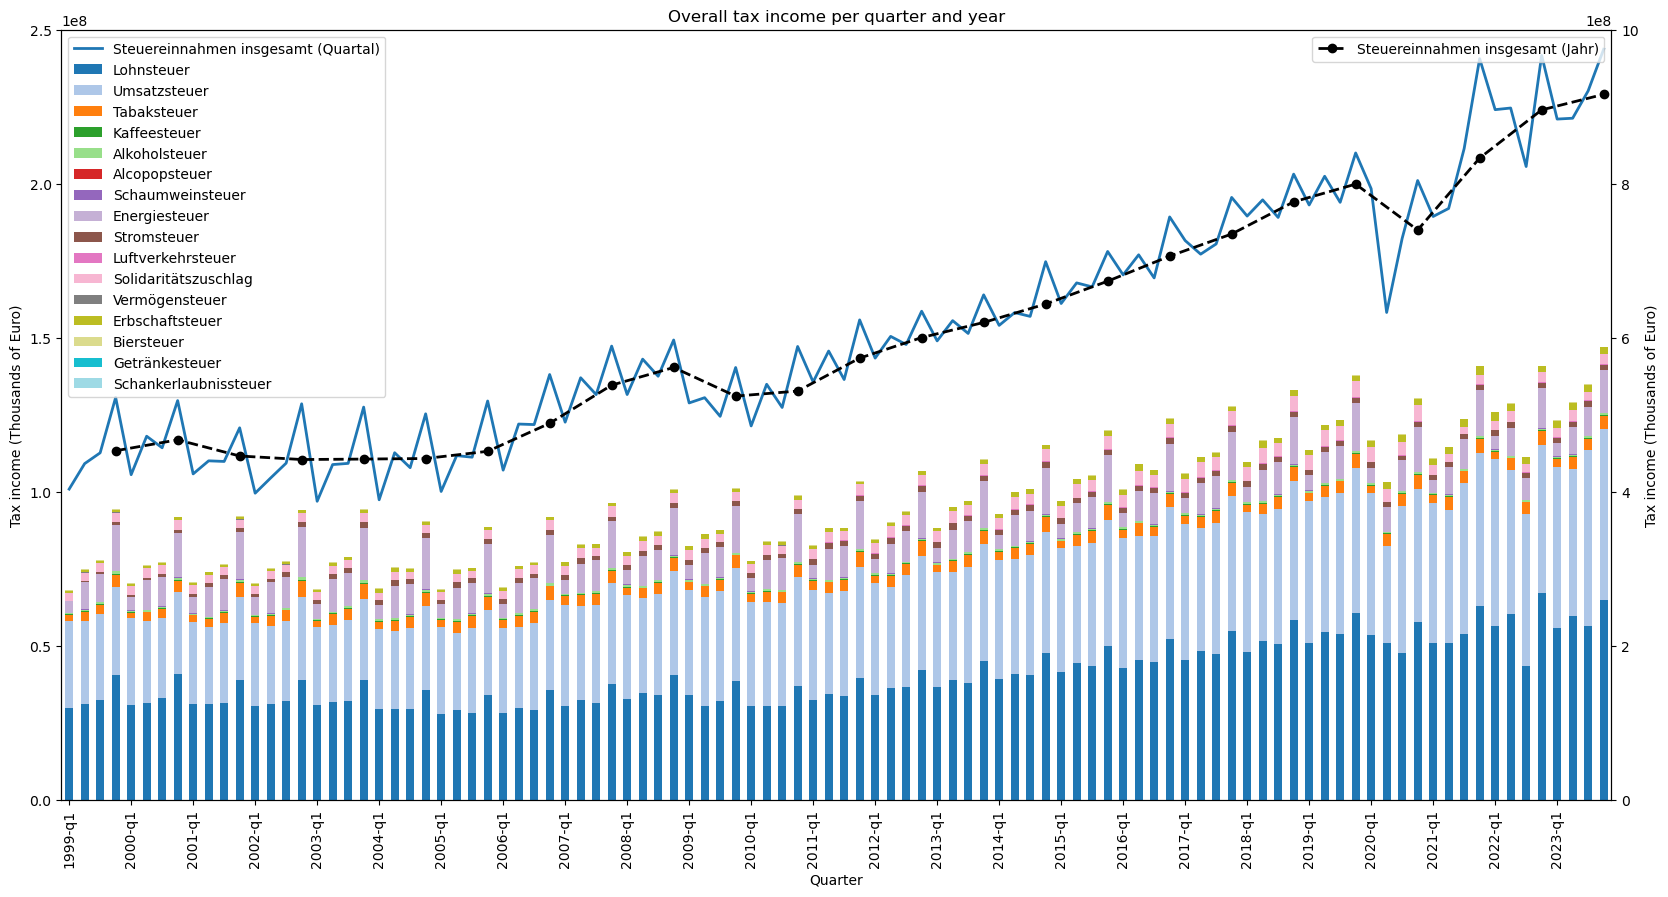

In [5]:
ax = df_q[1:].T.plot(figsize=(20, 10), kind='bar', stacked=True, colormap='tab20')
ax.plot(df_q.iloc[0, :], linewidth=2, label='Steuereinnahmen insgesamt (Quartal)')

ax2 = ax.twinx()
yearly_data = [df_q.iloc[0, i:i+4].sum() for i in range(0, len(df_q.columns), 4)]
ax2.plot(range(3, len(df_q.columns), 4), yearly_data, 'o--', color='black', linewidth=2, label='Steuereinnahmen insgesamt (Jahr)')

ax.legend()
ax2.legend()

ax.set_xticks(range(0, len(df_q.columns), 4))

ax.set_ylim(0, 2.5e8)
ax2.set_ylim(0, 10e8)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(8, 8))

ax.set_title('Overall tax income per quarter and year')
ax.set_xlabel('Quarter')
ax.set_ylabel('Tax income (Thousands of Euro)')
ax2.set_ylabel('Tax income (Thousands of Euro)')

#### Question 2: Can we see seasonal variations in the data, specifically in the consumer goods taxes?

To answer the second question, we will look more closely at 6 different taxes and use the monthly dataset. We will also use a different visualization: By showing each year as an individual line plot from January to December, we can see how the consumer goods tax income changes both within a year and over multiple years. The figures each show the years 1999-2019 in a light to darker blue, and the (post-)covid years in red, yellow, and green for distinction. The mean value over all years is shown in a black dotted line. 

Looking at the data, we have to keep in mind that tax income values generally increase through the year with a huge spike in December, as we saw earlier. Still, the six figures tell us multiple interesting insights:

- The tabacco tax income (upper left) shows a clear dip in January and Februar, probably relating to many people's new year's resolutions. We can also see that many people presumably drop their resolutions as early as March, when tax income recoveres to a steady level for the rest of the year.
- Coffe tax income (upper right) shows a distinctive spike in April, which could be related to Easter Holidays, which is a typically celebrated with a brunch and coffee by many families.   
- Sparkling wine tax income (lower left) shows clear spikes in March (formerly) and February (more recently). These spikes could be related to carnival celebrations (though the shift from March to February remains unexplained). The December spike in the data is also stronger than for the other tax types, likely due to preparations for new year's celebrations. The sparkling wine tax income pattern also dominates the total alcohol tax income pattern (middle left).
- The beer tax income (lower right) shows a clear seasonal curve, with high values in summer months and lower values during spring and winter (except for January, interestingly). Here we can also see the strongest impact of the Covid pandemic during the early summer months of 2020. Additionally, we can see a general downwards trend in the beer tax income over the years, with the lighter blue lines consistently lining up above the darker blue lines. 
- The alcopop tax income (middle right) is hard to interpret, with small values and little variation and two outliners visible.

![question_2.png](../results/question_2.png)